In [1]:
import os 

os.chdir("/home/theovincent/MVA/3DPointCloud/3DPointCloudClassification")

# Pipeline to create the dataset

In [2]:
dataset_name = "MiniLille1"
is_train_data = True
seed = 1

## Load the dataset

In [3]:
import numpy as np 

from classifier_3D.utils.path import get_data_path
from classifier_3D.utils.ply_file import read_ply

dataset_path = get_data_path(dataset_name, is_train_data)
dataset, _ = read_ply(dataset_path)
points = np.vstack((dataset["x"], dataset["y"], dataset["z"])).T.astype(np.float32)

## Pick a center

In [4]:
from range_net import CENTERS, Z_GROUNDS, Z_GROUND


centers_bound = CENTERS[dataset_name]

weights = np.random.randint(0, 10, size=4).astype(float)
weights /= weights.sum()

center = np.append(weights @ centers_bound, [Z_GROUNDS[dataset_name] - Z_GROUND])

### Visualise the center

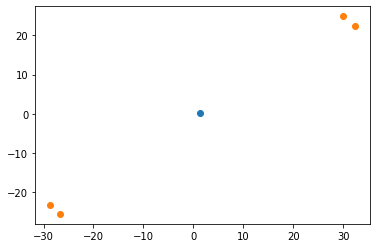

In [5]:
import matplotlib.pyplot as plt


plt.scatter(center[0], center[1])
_ = plt.scatter(centers_bound[:, 0], centers_bound[:, 1])

## Rotate the dataset

In [6]:
from range_net import ROTATIONS
center
theta = -ROTATIONS[dataset_name]

rotation = np.array([[np.cos(theta), - np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0], [0, 0, 1]])

### Visualise the rotation on the center points

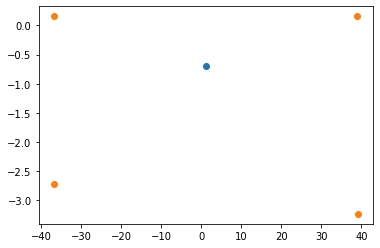

In [7]:
import matplotlib.pyplot as plt

rotated_center = center @ rotation.T
rotated_centers_bound = np.hstack((centers_bound, np.ones((centers_bound.shape[0], 1)))) @ rotation.T

plt.scatter(rotated_center[0], rotated_center[1])
_ = plt.scatter(rotated_centers_bound[:, 0], rotated_centers_bound[:, 1])

## Translate the dataset

In [8]:
centered_rotated_points = (points - np.expand_dims(center, axis=0)) @ rotation.T

## Clip points that are too far, too high and too close 

In [9]:
from range_net import MAX_DISTANCE, MAX_HEIGHT

to_keep = np.logical_and(np.linalg.norm(centered_rotated_points, axis=1) < MAX_DISTANCE, centered_rotated_points[:, 2] < MAX_HEIGHT)
clipped_points = centered_rotated_points[to_keep]

In [10]:
from classifier_3D.utils.ply_file import write_ply

write_ply("data/creation.ply", clipped_points, ["x", "y", "z"])

True